# Titanic example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_init = pd.read_csv("train.csv")
train_init.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_init = train_init.set_index("PassengerId")
print("num examples is", len(train_init))
train_init.head(10)

num examples is 891


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
X_init, y_init = train_init.drop(columns="Survived"), train_init["Survived"]
print(y_init.head(10))
X_init.head(10)

PassengerId
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
Name: Survived, dtype: int64


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# Първи модел

Ще направим модел без никаква обработка на данните.

Този модел ще ни служи за мерило колко сме постигнали.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_init, 
                                                  y_init, 
                                                  test_size=0.2, 
                                                  stratify=y_init, 
                                                  random_state=42)

print(len(y_train), len(y_val))
X_train.head(10)

712 179


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
653,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
510,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
558,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


In [6]:
X_train.describe()

,Pclass,Age,SibSp,Parch,Fare
count,712.000000,575.000000,712.000000,712.000000,712.000000
mean,2.308989,29.807687,0.492978,0.390449,31.819826
std,0.833563,14.485211,1.060720,0.838134,48.059104
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.500000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs", random_state=42, n_jobs=-1, verbose=1)
# solver:
# liblinear е това което знаем
# lbfgs by default
# saga better for large datasets

number_cols = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
fillv = X_train["Age"].mean()
X_train.loc[:, "Age"] = X_train["Age"].fillna(fillv)
X_val.loc[:, "Age"] = X_val["Age"].fillna(fillv)

trained_model = model.fit(X_train[number_cols], y_train)

print("Train score:", trained_model.score(X_train[number_cols], y_train))
print("Val score:", trained_model.score(X_val[number_cols], y_val))

c:\users\iddilov\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Train score: 0.7120786516853933
Val score: 0.6759776536312849


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


In [8]:
# 67.6% accuracy не звучи зле, ама да видим y колоната какво съдържа
y_train.describe()

count    712.000000
mean       0.383427
std        0.486563
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [9]:
# 38% оживели
# значи не сме много по-добре от просто да казваме че всеки е умрял
# да пробваме и с random forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=4, n_jobs=-1, random_state=42)

trained_model = model.fit(X_train[number_cols], y_train)

print("Train score:", trained_model.score(X_train[number_cols], y_train))
print("Val score:", trained_model.score(X_val[number_cols], y_val))

c:\users\iddilov\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Train score: 0.7724719101123596
Val score: 0.7039106145251397


In [10]:
# 70% e по-добре. И все пак наблюдаваме голям overfit.
# Извод който можем да си направим е че някои от зависимостите не са линейни, иначе логистичната регресия щеше да ги улови.

# Анализ на колоните
По-точно ще се интересуваме коя колона как може да помогне за класификацията

In [11]:
train_init.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


## P class

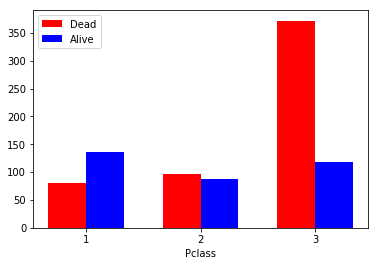

In [12]:
# Да направим картинка от коя класа колко живи и умрели има... Така ще видим има ли значение

AliveClass = [[len(train_init[(train_init.Survived == x) & (train_init.Pclass == y)]) for y in [1, 2, 3]] for x in [0, 1]]

bar_width = 0.33
r1 = np.arange(3)
r2 = r1 + bar_width

plt.bar(r1, AliveClass[0], width=bar_width, color="red", label="Dead")
plt.bar(r2, AliveClass[1], width=bar_width, color="blue", label="Alive")

plt.xlabel("Pclass")
plt.xticks(r1+bar_width/2, [1, 2, 3])

plt.legend()
plt.show()

In [13]:
# Веднага се забелязва че колкото по-висока класа си, толкова по-вероятно е да оживееш...
# Да добавим one hot encoding на тази променлива към нашите данни

data = train_init.copy()
# Начин 1
data["isClass1"] = (data["Pclass"] == 1) * 1
data["isClass2"] = (data["Pclass"] == 2) * 1
data["isClass3"] = (data["Pclass"] == 3) * 1
data = data.drop(columns="Pclass")
data.head(10)

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isClass1,isClass2,isClass3
PassengerId,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
6,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1
7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0
8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1
9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1


In [14]:
data = train_init.copy()
# Начин 2
data[["isClass_1", "isClass_2", "isClass_3"]] = pd.get_dummies(data["Pclass"], prefix="isClass") # забележка ако колоните имат еднакви имена, ги напасва

data = data.drop(columns = "Pclass")
data.head(10)

,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3
PassengerId,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
6,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0,1
7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0
8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0,1
9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,0,1


# Sex
Тая колона ще е straight forward

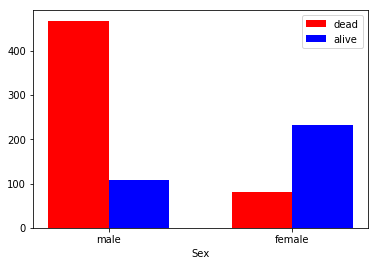

In [15]:
# Да започнем пак с графика, подобна на тази за класа

AliveSex = [[len(data[(data.Survived == x) & (data.Sex == y)]) for y in ['male', 'female']] for x in [0, 1]]

r1 = np.arange(2)
r2 = r1+bar_width

plt.bar(r1, AliveSex[0], color="red", width=bar_width, label="dead")
plt.bar(r2, AliveSex[1], color="blue", width=bar_width, label="alive")

plt.xlabel("Sex")
plt.xticks(r1+bar_width/2, ["male", "female"])

plt.legend()
plt.show()

In [16]:
# Очакван резултат... както и филма ни казва, жените по-скоро са оживявали и мъжете по-скоро умирали...

data[["female", "male"]] = pd.get_dummies(data["Sex"])

data = data.drop(columns = "Sex")
data.head(10)

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3,female,male
PassengerId,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
6,0,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,0,0,1,0,1
7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1,0,0,0,1
8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,0,0,1,0,1
9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,0,0,1,1,0


# Колоните Name и Age
Кво общо имат? Name не е ли безполезна?

In [17]:
# Name на първи поглед изглежда безполезна, но всъщност в name се съдържа информация за тва колко е дърт човек.
# Виждате че вътре има префикси на имената на всеки - Mr., Mrs., Master.

print("Master mean age:", data.loc[data.Name.str.contains("Master.", regex=False), "Age"].mean())
print("Mr mean age:", data.loc[data.Name.str.contains("Mr.", regex=False), "Age"].mean())
print("Mrs mean age:", data.loc[data.Name.str.contains("Mrs.", regex=False), "Age"].mean())
print("Miss mean age:", data.loc[data.Name.str.contains("Miss.", regex=False), "Age"].mean())

Master mean age: 4.574166666666667
Mr mean age: 32.368090452261306
Mrs mean age: 35.898148148148145
Miss mean age: 21.773972602739725


In [18]:
# Да попълним с тази информация дупките в колоната Age
data.loc[data.Name.str.contains("Master.", regex=False), "Age"] = data.loc[data.Name.str.contains("Master.", regex=False), "Age"].fillna(
    data.loc[data.Name.str.contains("Master.", regex=False), "Age"].mean()
)
data.loc[data.Name.str.contains("Mr.", regex=False), "Age"] = data.loc[data.Name.str.contains("Mr.", regex=False), "Age"].fillna(
    data.loc[data.Name.str.contains("Mr.", regex=False), "Age"].mean()
)
data.loc[data.Name.str.contains("Mrs.", regex=False), "Age"] = data.loc[data.Name.str.contains("Mrs.", regex=False), "Age"].fillna(
    data.loc[data.Name.str.contains("Mrs.", regex=False), "Age"].mean()
)
data.loc[data.Name.str.contains("Miss.", regex=False), "Age"] = data.loc[data.Name.str.contains("Miss.", regex=False), "Age"].fillna(
    data.loc[data.Name.str.contains("Miss.", regex=False), "Age"].mean()
)

data.loc[:, "Age"] = data.loc[:, "Age"].fillna(data.loc[:, "Age"].mean())

data.head(10)

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3,female,male
PassengerId,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
3,1,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,C123,S,1,0,0,1,0
5,0,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,NaN,S,0,0,1,0,1
6,0,"Moran, Mr. James",32.36809,0,0,330877,8.4583,NaN,Q,0,0,1,0,1
7,0,"McCarthy, Mr. Timothy J",54.00000,0,0,17463,51.8625,E46,S,1,0,0,0,1
8,0,"Palsson, Master. Gosta Leonard",2.00000,3,1,349909,21.0750,NaN,S,0,0,1,0,1
9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.00000,0,2,347742,11.1333,NaN,S,0,0,1,1,0


In [19]:
data = data.drop(columns = "Name")
data.head(10)

,Survived,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3,female,male
PassengerId,,,,,,,,,,,,,
1,0,22.00000,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
2,1,38.00000,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
3,1,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
4,1,35.00000,1,0,113803,53.1000,C123,S,1,0,0,1,0
5,0,35.00000,0,0,373450,8.0500,NaN,S,0,0,1,0,1
6,0,32.36809,0,0,330877,8.4583,NaN,Q,0,0,1,0,1
7,0,54.00000,0,0,17463,51.8625,E46,S,1,0,0,0,1
8,0,2.00000,3,1,349909,21.0750,NaN,S,0,0,1,0,1
9,1,27.00000,0,2,347742,11.1333,NaN,S,0,0,1,1,0


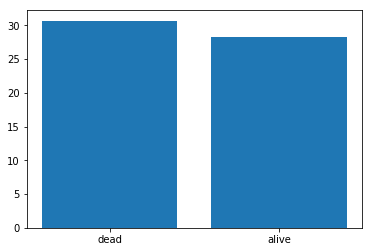

In [20]:
# Сега да видим картинка за връзката между възрастта и оцеляването както правихме последния път

AgeMeans = [data.loc[data.Survived == x, "Age"].mean() for x in [0, 1]]

plt.bar([0, 1], AgeMeans)

plt.xticks([0, 1], ["dead", "alive"])

plt.show()

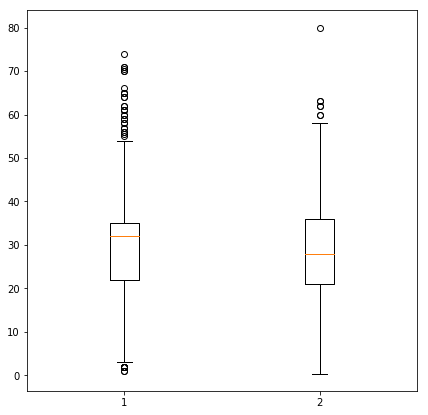

In [21]:
# Обаче това че средната възразст на умрелите е гд същата като на оживелите може и да не се дължи на това че няма връзка между
# възрастта и оцеляването

# Да видим нов тип графика която най-често е полезна при връзка между категорийни и числови променливи
plt.figure(figsize=(7, 7))
plt.boxplot([data.loc[data.Survived == x, "Age"] for x in [0, 1]])
plt.show()

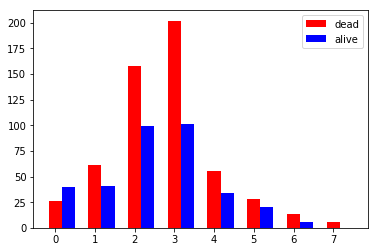

In [23]:
# Така може да забележим че разпределенията са различни, хистограми ще са полезни

diff = 10
maxAge = int(data.Age.max())
AliveAge = [[len(data[(data.Survived == x) & (data.Age >= y) & (data.Age < y+diff)]) for y in range(0, maxAge, diff)] for x in [0, 1]]

r1 = np.arange(maxAge//diff)
r2 = r1 + bar_width

plt.bar(r1, AliveAge[0], color="red", width=bar_width, label="dead")
plt.bar(r2, AliveAge[1], color="blue", width=bar_width, label="alive")

plt.legend()
plt.show()

In [24]:
# Така виждаме разликата в хистограмите година за година. Явно е че децата имат по-голям процент оцелели.
# Ще вкарам тези години през 10 в 10 различни колони

for i in range(0, maxAge, diff):
    data[f"Age{i}-{i+diff-1}"] = ((data["Age"] >= i) & (data["Age"] < i+diff)) * 1
    
data = data.drop(columns = "Age")
data.head(10)

,Survived,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3,female,male,Age0-9,Age10-19,Age20-29,Age30-39,Age40-49,Age50-59,Age60-69,Age70-79
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1,0,0,0,0,0
2,1,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,0,0,1,0,0,0,0
3,1,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0
4,1,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,0,1,0,0,0,0
5,0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,0,1,0,0,0,0
6,0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,0,0,0,1,0,0,0,0
7,0,0,0,17463,51.8625,E46,S,1,0,0,0,1,0,0,0,0,0,1,0,0
8,0,3,1,349909,21.0750,NaN,S,0,0,1,0,1,1,0,0,0,0,0,0,0
9,1,0,2,347742,11.1333,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0


# Parch and SibSp
Брой родители и деца и брой братя и сестри

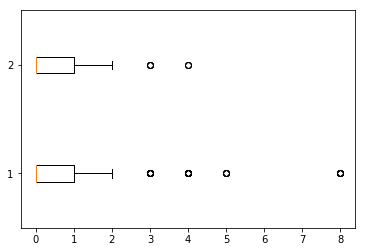

In [24]:
# Да направим boxplot-чета

plt.boxplot([data.loc[data.Survived==x, "SibSp"] for x in [0, 1]], vert=False)
plt.show()

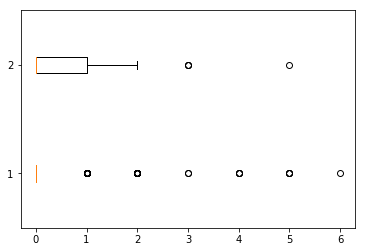

In [25]:
plt.boxplot([data.loc[data.Survived==x, "Parch"] for x in [0, 1]], vert=False)
plt.show()

In [26]:
# Изглежда броя братя, сестри е безполезен, само outlier-ите се отличават
# Обаче в броя деца и родители има някаква разлика. Тея с повече деца и родители явно живеят повече.
# Тъй като в случая връзката изглежда колкото повече толкова по-добре, няма да one hot encode-вам

data = data.drop(columns = "SibSp")
data.head(10)

,Survived,Parch,Ticket,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3,female,male,Age0-9,Age10-19,Age20-29,Age30-39,Age40-49,Age50-59,Age60-69,Age70-79
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1,0,0,0,0,0
2,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,0,0,1,0,0,0,0
3,1,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0
4,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,0,1,0,0,0,0
5,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,0,1,0,0,0,0
6,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,0,0,0,1,0,0,0,0
7,0,0,17463,51.8625,E46,S,1,0,0,0,1,0,0,0,0,0,1,0,0
8,0,1,349909,21.0750,NaN,S,0,0,1,0,1,1,0,0,0,0,0,0,0
9,1,2,347742,11.1333,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0


# Ticket and Fare

In [27]:
# Ticket изглежда безполезно, от описанието на данните в kaggle има яснота че някои номера на билети се срещат по над веднъж,
# така че може би всеки билет колко пъти се среща би дало някакъв сигнал

# Правя го квадратно ма е на 1 ред :D
data["TicketFreq"] = [sum(data["Ticket"]==x) for x in data["Ticket"]]
data = data.drop(columns="Ticket")
data.head(10)

,Survived,Parch,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3,female,male,Age0-9,Age10-19,Age20-29,Age30-39,Age40-49,Age50-59,Age60-69,Age70-79,TicketFreq
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,0,7.2500,NaN,S,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,1,0,71.2833,C85,C,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,1,0,7.9250,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0,1
4,1,0,53.1000,C123,S,1,0,0,1,0,0,0,0,1,0,0,0,0,2
5,0,0,8.0500,NaN,S,0,0,1,0,1,0,0,0,1,0,0,0,0,1
6,0,0,8.4583,NaN,Q,0,0,1,0,1,0,0,0,1,0,0,0,0,1
7,0,0,51.8625,E46,S,1,0,0,0,1,0,0,0,0,0,1,0,0,1
8,0,1,21.0750,NaN,S,0,0,1,0,1,1,0,0,0,0,0,0,0,4
9,1,2,11.1333,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0,3


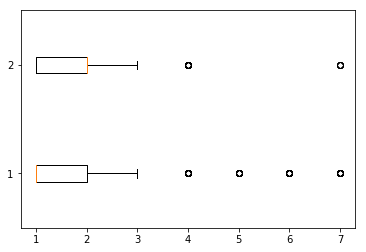

In [28]:
# Ся пак 2 boxplot-а

plt.boxplot([data.loc[data.Survived==x, "TicketFreq"] for x in [0, 1]], vert=False)
plt.show()

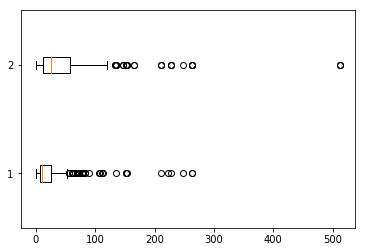

In [29]:
plt.boxplot([data.loc[data.Survived==x, "Fare"] for x in [0, 1]], vert=False)
plt.show()

In [30]:
# Ами така като гледам TicketFreq носи някъв потенциално минимален сигнал, Цената като че ли носи повече сигнал.
# Хубавото и при двете е че имаме наредба спрямо survived, така че може да не ги енкодваме.
# Съответно няма да ги пипам повече.
data.head(10)

,Survived,Parch,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3,female,male,Age0-9,Age10-19,Age20-29,Age30-39,Age40-49,Age50-59,Age60-69,Age70-79,TicketFreq
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,0,7.2500,NaN,S,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,1,0,71.2833,C85,C,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,1,0,7.9250,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0,1
4,1,0,53.1000,C123,S,1,0,0,1,0,0,0,0,1,0,0,0,0,2
5,0,0,8.0500,NaN,S,0,0,1,0,1,0,0,0,1,0,0,0,0,1
6,0,0,8.4583,NaN,Q,0,0,1,0,1,0,0,0,1,0,0,0,0,1
7,0,0,51.8625,E46,S,1,0,0,0,1,0,0,0,0,0,1,0,0,1
8,0,1,21.0750,NaN,S,0,0,1,0,1,1,0,0,0,0,0,0,0,4
9,1,2,11.1333,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0,3


# Cabin
Безполезна ли е тази колона

In [31]:
sum(data.Cabin.isna())/len(data)

0.7710437710437711

In [32]:
# 77% NaN
# Освен това останалите стойности са уникални... Ква полза може да имаме?

In [33]:
# Отговор: може да видим Първите букви които сигурно отговарят на палуба или нещо такова
# И все пак дори първата буква да носи сигнал, тя ще влияе на само 23% от данните,
# т.е. колко полезен може да е този атрибут е умножено по 1/4 щото само в толкова от данните изобщо може да повлияе...
# И без тва си утрепахме много време... Да видим дали ще се струва?
data["Cabin"] = data["Cabin"].str[0]
data.head(10)

,Survived,Parch,Fare,Cabin,Embarked,isClass_1,isClass_2,isClass_3,female,male,Age0-9,Age10-19,Age20-29,Age30-39,Age40-49,Age50-59,Age60-69,Age70-79,TicketFreq
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,0,7.2500,NaN,S,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,1,0,71.2833,C,C,1,0,0,1,0,0,0,0,1,0,0,0,0,1
3,1,0,7.9250,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0,1
4,1,0,53.1000,C,S,1,0,0,1,0,0,0,0,1,0,0,0,0,2
5,0,0,8.0500,NaN,S,0,0,1,0,1,0,0,0,1,0,0,0,0,1
6,0,0,8.4583,NaN,Q,0,0,1,0,1,0,0,0,1,0,0,0,0,1
7,0,0,51.8625,E,S,1,0,0,0,1,0,0,0,0,0,1,0,0,1
8,0,1,21.0750,NaN,S,0,0,1,0,1,1,0,0,0,0,0,0,0,4
9,1,2,11.1333,NaN,S,0,0,1,1,0,0,0,1,0,0,0,0,0,3


In [34]:
vals = data["Cabin"].unique()
vals

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [35]:
vals = vals[1:]

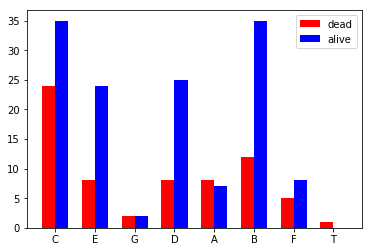

In [36]:
AliveCabin = [[sum((data.Cabin == y) & (data.Survived == x)) for y in vals] for x in [0, 1]]

r1 = np.arange(len(vals))
r2 = r1 + bar_width

plt.bar(r1, AliveCabin[0], color="red", width=bar_width, label="dead")
plt.bar(r2, AliveCabin[1], color="blue", width=bar_width, label="alive")

plt.xticks(r1+bar_width/2, vals)

plt.legend()
plt.show()

In [37]:
# Интересно, като цяло тези за които има данни оживяват повечко
# Все пак трябва да имаме предвид статистическата незначимост на сравнително малкото количество данни.
# Ся кат се замисля възможно е начина по който са събирали тея данни е да питат оцелелите абе в коя каюта беше? Случайно да познаваш някои другу в кои каюти са били?
# Ще ги добавя все пак.
data[sorted(["Cabin_"+v for v in vals])] = pd.get_dummies(data["Cabin"], prefix="Cabin")
data = data.drop(columns = "Cabin")
data.head(10)

,Survived,Parch,Fare,Embarked,isClass_1,isClass_2,isClass_3,female,male,Age0-9,...,Age70-79,TicketFreq,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,7.2500,S,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,71.2833,C,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0,7.9250,S,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,53.1000,S,1,0,0,1,0,0,...,0,2,0,0,1,0,0,0,0,0
5,0,0,8.0500,S,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,8.4583,Q,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7,0,0,51.8625,S,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
8,0,1,21.0750,S,0,0,1,0,1,1,...,0,4,0,0,0,0,0,0,0,0
9,1,2,11.1333,S,0,0,1,1,0,0,...,0,3,0,0,0,0,0,0,0,0


# Embarked
Почти сме готови с feature engineering

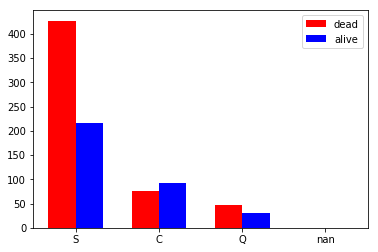

In [38]:
vals = data.Embarked.unique()

AliveEmbarked = [[sum((data.Survived == x) & (data.Embarked == y)) for y in vals] for x in [0, 1]]

r1 = np.arange(len(vals))
r2 = r1 + bar_width

plt.bar(r1, AliveEmbarked[0], color="red", width=bar_width, label="dead")
plt.bar(r2, AliveEmbarked[1], color="blue", width=bar_width, label="alive")

plt.xticks(r1+bar_width/2, vals)

plt.legend()
plt.show()

In [39]:
# Има сигнал, са виждам че има и nan, но при one hot encoding e ок да го оставим така.
vals = vals[:-1]
data[sorted(["Embarked_"+v for v in vals])] = pd.get_dummies(data["Embarked"], prefix="Embarked")
data = data.drop(columns = "Embarked")
data.head(10)

,Survived,Parch,Fare,isClass_1,isClass_2,isClass_3,female,male,Age0-9,Age10-19,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,0,7.2500,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,71.2833,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,7.9250,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,8.4583,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,51.8625,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,1,21.0750,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
9,1,2,11.1333,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Няколко думи за статистика
При този анализ на връзки между feature-и често се използват статистически тестове.
Няколко думи за това...

# Да си направим моделите

In [40]:
# Директно ще ви покажа grid search (нахалния начин да научкаме хиперпараметрите :D)

from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(random_state=42)

params = {
    'C' : [1e-2, 1e-1, 1, 1e1, 1e2]
}

gs = GridSearchCV(log_reg, params, scoring="accuracy", cv=5, n_jobs=-1, return_train_score=True)

X_train = data.drop(columns = "Survived")
y_train = data["Survived"]

gs.fit(X_train, y_train)

results = pd.DataFrame(gs.cv_results_)
results[["params", "rank_test_score", "mean_train_score", "mean_test_score", "mean_fit_time"]]

,params,rank_test_score,mean_train_score,mean_test_score,mean_fit_time
0,{'C': 0.01},5,0.799938,0.784512,0.003189
1,{'C': 0.1},4,0.805837,0.793490,0.003787
2,{'C': 1},3,0.819867,0.803591,0.005395
3,{'C': 10.0},2,0.822952,0.804714,0.006601
4,{'C': 100.0},1,0.823232,0.808081,0.007404


In [41]:
params = {
    'C' : [1e1, 1e2, 1e3, 1e4, 1e5]
}

gs = GridSearchCV(log_reg, params, scoring="accuracy", cv=5, n_jobs=-1, return_train_score=True)

gs.fit(X_train, y_train)

results = pd.DataFrame(gs.cv_results_)
results[["params", "rank_test_score", "mean_train_score", "mean_test_score", "mean_fit_time"]]

,params,rank_test_score,mean_train_score,mean_test_score,mean_fit_time
0,{'C': 10.0},5,0.822952,0.804714,0.005192
1,{'C': 100.0},1,0.823232,0.808081,0.006590
2,{'C': 1000.0},1,0.823233,0.808081,0.009001
3,{'C': 10000.0},1,0.823233,0.808081,0.010205
4,{'C': 100000.0},1,0.823513,0.808081,0.008620


In [42]:
# По принцип има и опцията refit на GridSearchCV, по дифолт е True...
# Малко ще свършим неговата работа ама има полза

log_reg = LogisticRegression(C=100, random_state=42)

log_reg.fit(X_train, y_train)

log_reg.coef_

array([[-1.69558190e-01,  4.50525498e-03,  1.11348730e+00,
         8.80482137e-01, -2.60580768e-01,  2.25651260e+00,
        -5.23123934e-01,  3.51687264e-01, -1.65985178e+00,
        -1.74322794e+00, -1.75105113e+00, -2.14718428e+00,
        -2.64174832e+00, -2.69362330e+00, -5.74543074e+00,
        -2.62490862e-01,  5.40954992e-01,  8.91841666e-01,
         2.88595351e-01,  1.31464619e+00,  1.70365905e+00,
         9.88383302e-01, -9.45522162e-01, -2.40871393e+00,
        -8.34444576e-01, -9.82119618e-01, -1.40053690e+00]])

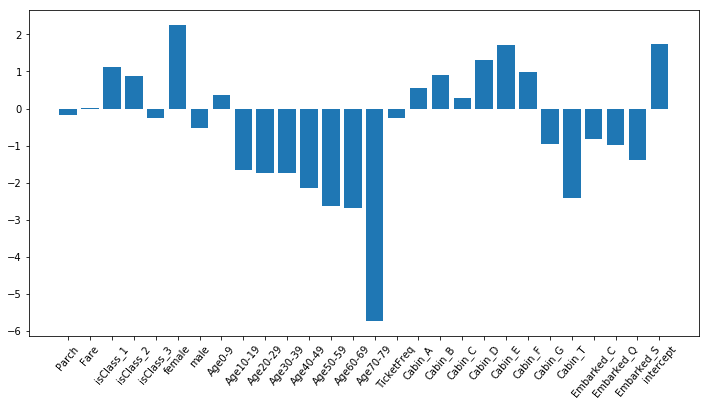

In [43]:
log_reg.coef_
plt.figure(figsize = (12, 6))
args = list(X_train.columns) + ["intercept"]
plt.bar(np.arange(len(args)), 
        np.concatenate(
            (log_reg.coef_.reshape(-1), log_reg.intercept_.reshape(-1)),
            axis=None
        ))
plt.xticks(np.arange(len(args)), args, rotation=50)
plt.show()

In [44]:
# И сега да пробваме с RandomForest

rforest = RandomForestClassifier(random_state=42)

params = {
    "n_estimators": [10, 30, 100],
    "max_depth" : [2, 3, 5, 10],
    "min_samples_leaf" : [10, 30, 100]
}

gs = GridSearchCV(rforest, params, scoring="accuracy", cv=5, n_jobs=-1, return_train_score=True)

gs.fit(X_train, y_train)

results = pd.DataFrame(gs.cv_results_)
results[["params", "rank_test_score", "mean_train_score", "mean_test_score", "mean_fit_time"]].sort_values("rank_test_score")

,params,rank_test_score,mean_train_score,mean_test_score,mean_fit_time
19,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",1,0.817901,0.811448,0.086800
28,"{'max_depth': 10, 'min_samples_leaf': 10, 'n_e...",2,0.828287,0.808081,0.081000
29,"{'max_depth': 10, 'min_samples_leaf': 10, 'n_e...",3,0.828845,0.803591,0.226197
2,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",4,0.810891,0.802469,0.250799
18,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",5,0.816217,0.799102,0.029600
27,"{'max_depth': 10, 'min_samples_leaf': 10, 'n_e...",6,0.821837,0.797980,0.029400
20,"{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...",6,0.824075,0.797980,0.260600
10,"{'max_depth': 3, 'min_samples_leaf': 10, 'n_es...",6,0.806401,0.797980,0.080200
22,"{'max_depth': 5, 'min_samples_leaf': 30, 'n_es...",9,0.796015,0.794613,0.077800
11,"{'max_depth': 3, 'min_samples_leaf': 10, 'n_es...",10,0.812850,0.793490,0.259400


In [45]:
params = {
    "n_estimators": [10, 30, 100],
    "max_depth" : [2, 3, 5, 10, 15],
    "min_samples_leaf" : [1, 3, 10]
}

gs = GridSearchCV(rforest, params, scoring="accuracy", cv=5, n_jobs=-1, return_train_score=True)

gs.fit(X_train, y_train)

results = pd.DataFrame(gs.cv_results_)
results[["params", "rank_test_score", "mean_train_score", "mean_test_score", "mean_fit_time"]].sort_values("rank_test_score")

,params,rank_test_score,mean_train_score,mean_test_score,mean_fit_time
41,"{'max_depth': 15, 'min_samples_leaf': 3, 'n_es...",1,0.878514,0.827160,0.254599
32,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",2,0.877674,0.826038,0.274000
31,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",2,0.872062,0.826038,0.083000
40,"{'max_depth': 15, 'min_samples_leaf': 3, 'n_es...",4,0.876549,0.824916,0.083000
28,"{'max_depth': 10, 'min_samples_leaf': 1, 'n_es...",5,0.928459,0.823793,0.086199
29,"{'max_depth': 10, 'min_samples_leaf': 1, 'n_es...",6,0.931826,0.819304,0.278199
39,"{'max_depth': 15, 'min_samples_leaf': 3, 'n_es...",7,0.872621,0.818182,0.029800
30,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",7,0.869253,0.818182,0.030800
27,"{'max_depth': 10, 'min_samples_leaf': 1, 'n_es...",9,0.925650,0.815937,0.030201
20,"{'max_depth': 5, 'min_samples_leaf': 1, 'n_est...",10,0.856630,0.812570,0.266600


In [46]:
# 82.7% е по-добре

rforest = RandomForestClassifier(n_estimators = 100, 
                                 max_depth = 15,
                                 min_samples_leaf = 3,
                                 random_state=42)

rforest.fit(X_train, y_train)

rforest.feature_importances_

array([2.67380876e-02, 1.61983064e-01, 3.88340146e-02, 1.98470083e-02,
       8.23273771e-02, 2.21958812e-01, 2.13205396e-01, 4.19685416e-02,
       6.11561066e-03, 1.22726031e-02, 1.84035492e-02, 7.60662058e-03,
       3.35011276e-03, 3.57255598e-03, 2.85153298e-04, 6.43862462e-02,
       3.56398552e-03, 6.17099927e-03, 6.29124613e-03, 6.58429856e-03,
       1.13559342e-02, 1.13385114e-03, 2.18204993e-04, 0.00000000e+00,
       1.42530519e-02, 8.42966358e-03, 1.91440122e-02])

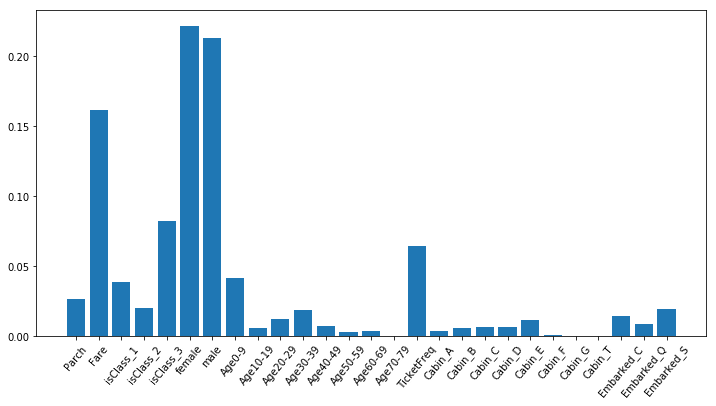

In [47]:
plt.figure(figsize = (12, 6))
args = X_train.columns
plt.bar(np.arange(len(args)), 
        rforest.feature_importances_)
plt.xticks(np.arange(len(args)), args, rotation=50)
plt.show()

# Да си качим отговора в kaggle

In [48]:
# Ще ни трябва функция която прави цялата обработка и върху тестовите данни
# бая копи пейст... ама внимавайте бая (навсякъде където запълвате със стойности)!!!

def process_test(data):
    data[["isClass_1", "isClass_2", "isClass_3"]] = pd.get_dummies(data["Pclass"], prefix="isClass")
    data = data.drop(columns = "Pclass")
    data[["female", "male"]] = pd.get_dummies(data["Sex"])
    data = data.drop(columns = "Sex")

    data.loc[data.Name.str.contains("Master.", regex=False), "Age"] = data.loc[data.Name.str.contains("Master.", regex=False), "Age"].fillna(
        train_init.loc[train_init.Name.str.contains("Master.", regex=False), "Age"].mean()
    )
    data.loc[data.Name.str.contains("Mr.", regex=False), "Age"] = data.loc[data.Name.str.contains("Mr.", regex=False), "Age"].fillna(
        train_init.loc[train_init.Name.str.contains("Mr.", regex=False), "Age"].mean()
    )
    data.loc[data.Name.str.contains("Mrs.", regex=False), "Age"] = data.loc[data.Name.str.contains("Mrs.", regex=False), "Age"].fillna(
        train_init.loc[train_init.Name.str.contains("Mrs.", regex=False), "Age"].mean()
    )
    data.loc[data.Name.str.contains("Miss.", regex=False), "Age"] = data.loc[data.Name.str.contains("Miss.", regex=False), "Age"].fillna(
        train_init.loc[train_init.Name.str.contains("Miss.", regex=False), "Age"].mean()
    )

    data.loc[:, "Age"] = data.loc[:, "Age"].fillna(train_init.loc[:, "Age"].mean())

    data = data.drop(columns = "Name")

    diff = 10
    maxAge = int(train_init.Age.max())
    for i in range(0, maxAge, diff):
        data["Age"+str(i)+"-"+str(i+diff-1)] = ((data["Age"] >= i) & (data["Age"] < i+diff)) * 1

    data = data.drop(columns = "Age")

    data = data.drop(columns = "SibSp")

    data["TicketFreq"] = [sum(data["Ticket"]==x) for x in data["Ticket"]] #тва може да е по-кадърно ма ме мързи
    data = data.drop(columns="Ticket")

    vals = train_init["Cabin"].str[0].unique()
    vals = vals[1:]
    vals.sort()
    data["Cabin"] = data["Cabin"].str[0]
    for v in vals:
        data["Cabin_"+v] = (data["Cabin"] == v) * 1
    data = data.drop(columns = "Cabin")

    vals = train_init.Embarked.unique()
    vals = vals[:-1]
    data[sorted(["Embarked_"+v for v in vals])] = pd.get_dummies(data["Embarked"], prefix="Embarked")
    data = data.drop(columns = "Embarked")
    
    return data

In [49]:
X_test = pd.read_csv("test.csv")
X_test = X_test.set_index("PassengerId")

X_test = process_test(X_test)
X_test.head(10)

,Parch,Fare,isClass_1,isClass_2,isClass_3,female,male,Age0-9,Age10-19,Age20-29,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0,7.8292,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
893,0,7.0000,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
894,0,9.6875,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
895,0,8.6625,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
896,1,12.2875,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
897,0,9.2250,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
898,0,7.6292,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
899,1,29.0000,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
900,0,7.2292,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
X_test.isna().sum()

Parch         0
Fare          1
isClass_1     0
isClass_2     0
isClass_3     0
female        0
male          0
Age0-9        0
Age10-19      0
Age20-29      0
Age30-39      0
Age40-49      0
Age50-59      0
Age60-69      0
Age70-79      0
TicketFreq    0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [51]:
X_test["Fare"].fillna(train_init["Fare"].mean(), inplace=True)

In [52]:
X_test.isna().sum()

Parch         0
Fare          0
isClass_1     0
isClass_2     0
isClass_3     0
female        0
male          0
Age0-9        0
Age10-19      0
Age20-29      0
Age30-39      0
Age40-49      0
Age50-59      0
Age60-69      0
Age70-79      0
TicketFreq    0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_T       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [53]:
rforest.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
prediction = X_test.drop(columns = X_test.columns)
prediction.head(10)

""
PassengerId
892
893
894
895
896
897
898
899
900


In [55]:
prediction["Survived"] = rforest.predict(X_test)
prediction.head(10)

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1


In [56]:
prediction.to_csv("prediction.csv")

In [57]:
# test accuracy 0.78947, позиция 3337/14122
# коментар
# side notе: с друг ноутбук имам 0.80382 ама тва не е ясно колко statistically significant e